#**Assignment – Model Selection**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1.Load the dataset into python environment

In [5]:
data = pd.read_csv('/home/hari/Downloads/titanic_dataset .csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.shape

(891, 12)

##2. Do all the necessary pre-processing steps

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
data.Age.isna().sum()

0

In [12]:
data = data.drop('Cabin',axis=1)

In [13]:
data[data['Embarked'].isna()].index

Int64Index([61, 829], dtype='int64')

In [14]:
data.drop([61, 829],inplace=True)

In [15]:
data['Embarked'].isna().sum()

0

In [16]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df = data.drop(['Name','Ticket','Embarked'],axis=1)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [19]:
df = pd.get_dummies(df)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1


##3. Create kNN and SVM models

In [21]:
x=df.drop(['PassengerId','Survived'],axis=1)
y=df['Survived']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

###kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [26]:
metric_k = []
neighbors = np.arange(3,15)

In [27]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_model = classifier.fit(x_train,y_train)
  y_predictions = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_predictions)
  metric_k.append(acc)

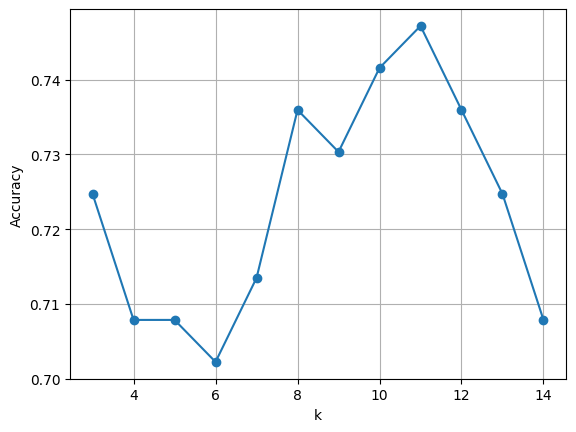

In [28]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 11,metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_predictions))

Accuracy =  0.7471910112359551


In [30]:
confusion_matrix(y_test,y_predictions)

array([[90, 19],
       [26, 43]])

###SVM

In [31]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svm_model = svmclf.fit(x_train,y_train)

In [32]:
y_pred = svmclf.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  0.797752808988764


##4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

###K-Fold Cross Validation on kNN

In [34]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)

In [35]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(knn_model,x,y,cv=kfold_validator)

In [36]:
cv_result

array([0.61797753, 0.65168539, 0.65168539, 0.75280899, 0.69662921,
       0.75280899, 0.66292135, 0.74157303, 0.76404494, 0.75      ])

In [37]:
np.mean(cv_result)

0.7042134831460675

###K-Fold Cross Validation on SVM

In [38]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(svm_model,x,y,cv=kfold_validator)

In [39]:
cv_result

array([0.80898876, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76136364])

In [40]:
np.mean(cv_result)

0.7862487231869254

###Stratified Cross Validation on kNN

In [41]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

In [42]:
cv_result = cross_val_score(knn_model,x,y,cv=skfold_validator)
cv_result

array([0.62921348, 0.62921348, 0.6741573 , 0.78651685, 0.70786517,
       0.73033708, 0.70786517, 0.74157303, 0.73033708, 0.72727273])

In [43]:
np.mean(cv_result)

0.7064351378958121

###Stratified Cross Validation on SVM

In [44]:
cv_result = cross_val_score(svm_model,x,y,cv=skfold_validator)
cv_result

array([0.80898876, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76136364])

In [45]:
np.mean(cv_result)

0.7862487231869254